<center><h1>bogaziciAI Winter Camp</h1></center>
<center><h2>Workshop 2</h2></center>

<center><h3>Grading Table</h3></center>

<table>
  <col>
  <colgroup span="3"></colgroup>
  <colgroup span="2"></colgroup>
  <tr>
    <td rowspan="1"></td>
    <th colspan="1" scope="colgroup">Part 1</th>>
    <th colspan="1" scope="colgroup">Part 2</th>
    <th colspan="1" scope="colgroup">Total</th>
  </tr>
  <tr>
    <th scope="row">Points</th>
    <td>50</td>
    <td>50</td>
    <td>100</td>
  </tr>
</table>

In [53]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, neighbors, cluster
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import cm
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split
import pandas as pd

# Part 1 - K Nearest Neighbors

We will use the famous iris dataset in this part.

In [54]:
df = pd.read_csv('iris.data',names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])


### Step 1

Split the dataset into train and test sets.

In [55]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)


### Step 2

Standardize the dataset

In [56]:
Scale = StandardScaler()
X_train = Scale.fit_transform(X_train)
X_test = Scale.transform(X_test)

### Step 3

Write your custom KNN class

In [57]:
from statistics import mode
class CustomKNN:
    val = []
    def fit(self,x_train,y_train):
        self.val = [(x_train[i],y_train[i]) for i in range(len(x_train))]
    def predict(self,X_test,k):
        dist1 = [(self.dist(X_test,self.val[i][0]),y_train[i]) for i in range(len(self.val))]
        dist1.sort(key=lambda tup:tup[0])
        ans = [x[1] for x in dist1[:k]] 
        return mode(ans)
    def dist(self,target,current):
        return np.sum(((target-current)**2)**(1/2))
    def score(self,x_test,y_test,k):
        true = 0
        false = 0
        for i in range(len(y_test)):
            if(self.predict(x_test[i],k)==y_test[i]):
                true += 1
            else:
                false += 1
        return 1.0-(false/(true+false))

            

### Step 4

Fit the training data to model

In [58]:
myKnn = CustomKNN()
myKnn.fit(X_train,y_train)
myKnn.predict(X_test,5)

'Iris-versicolor'

### Step 5

Evaluate the accuracy

In [59]:
ans = [myKnn.score(X_test,y_test,i) for i in range(1,10)]
for i in range(1,11):
    print(i,myKnn.score(X_test,y_test,i))

1 0.9473684210526316
2 0.9473684210526316
3 0.9736842105263158
4 0.9736842105263158
5 0.9736842105263158
6 0.9736842105263158
7 0.9736842105263158
8 0.9736842105263158
9 0.9736842105263158
10 0.9736842105263158


### Step 6

Use sklearn's KNN classifier and compare the results

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(i,knn.score(X_test,y_test))

1 0.9736842105263158
2 0.9736842105263158
3 1.0
4 1.0
5 0.9736842105263158
6 1.0
7 0.9736842105263158
8 1.0
9 1.0
10 1.0


### Step 7

We have gathered 5 unknown samples below. Predict which sample belongs to which category. <br>
*Hint: You can use classifier.predict(x) method.* <br>
**Extra:** Indicate the probability of prediction.


| Sepal Length | Sepal Width | Petal Length | Petal Width | Class | 
| :-: | :-: | :-: | :-: | :-: |
| 4.5 | 3.0 | 1.5 | 0.5 | Unknown |
| 7.0 | 3.0 | 5.0 | 1.5 | Unknown |
| 6.0 | 2.5 | 5.0 | 2.0 | Unknown |
| 7.0 | 3.0 | 4.5 | 1.0 | Unknown |
| 6.0 | 2.0 | 5.0 | 1.5 | Unknown |

In [62]:
for x,y in zip(Scale.transform([[4.5 , 3.0 , 1.5 , 0.5],[7.0 , 3.0 , 5.0 , 1.5],[6.0 , 2.5 , 5.0 , 2.0],[ 7.0 , 3.0 , 4.5 , 1.0],[6.0 , 2.0 , 5.0 , 1.5]]),knn.predict(Scale.transform([[4.5 , 3.0 , 1.5 , 0.5],[7.0 , 3.0 , 5.0 , 1.5],[6.0 , 2.5 , 5.0 , 2.0],[ 7.0 , 3.0 , 4.5 , 1.0],[6.0 , 2.0 , 5.0 , 1.5]]))):
    print("Custom knn: "+myKnn.predict(x,5)+" sklearn_knn: "+y)


Custom knn: Iris-setosa sklearn_knn: Iris-setosa
Custom knn: Iris-versicolor sklearn_knn: Iris-versicolor
Custom knn: Iris-virginica sklearn_knn: Iris-virginica
Custom knn: Iris-versicolor sklearn_knn: Iris-versicolor
Custom knn: Iris-versicolor sklearn_knn: Iris-versicolor


# Part 2 - K-Means Clustering

## Dataset
<br>
We use dataset from https://www.kaggle.com/kandij/mall-customers throughout this notebook.

In [63]:
df = pd.read_csv("segmented_customers-2.csv")
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### Step 1
<br>
For this part, we will only use Age and Spending Score columns.
<br>
Plot the dataframe so that "Age" column is on the x axis and "Spending Score (1-100)" is on the y axis.

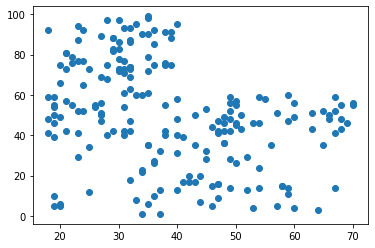

In [64]:
plt.scatter(df["Age"],df["Spending Score (1-100)"])
plt.show()

### Step 2
<br>
Implement your own simple Kmeans algorithm without using pre-implemented libraries for KMeans. You can 
refer to the structure below while structuring your code. You do not have to use the same structure. 
Any type of initialization method for your centroids is accepted. You will solely be graded on whether or not your algorithm performs as expected, we will not take the accuracy into account as long as the algorithm gives meaningful results.

In [65]:
def Kmeans(var,k):
    random = np.random.choice(var.shape[0],k,replace=False)
    centroids = var[random]
    points = []
    while True:
        new_centroids = [[] for i in range(k)]
        for i in var:
            dist = np.Inf
            closest = -1
            for j in range(k):
                if(distance(i,centroids[j])<dist):
                    dist = distance(i,centroids[j])
                    closest = j
            new_centroids[closest].append(i)  
        points = new_centroids
        new_centroids = [np.mean(i, axis = 0) for i in new_centroids]
        if(np.array_equal(centroids,new_centroids)):
            break
        centroids = new_centroids
    return centroids,points
def plot(centroids,k,points):   
    fig,ax = plt.subplots(figsize = (12,8))
    color = cm.rainbow(np.linspace(0,1,k))
    for i,cluster in enumerate(points):
        for j in cluster:
            ax.scatter(j[0],j[1],color=color[i])
    for cent in centroids:
        ax.scatter(cent[0],cent[1],marker="x",color="black",linewidth=3)
    plt.show()
def inertia(centroids,k):
    inertia = 0
    for i in X:
        closest = 0
        for j in range(k):
            if(distance(i,centroids[j])<distance(centroids[closest],i)):
                closest = j
        inertia += distance(centroids[closest],i)**2
    return inertia
def distance(x,y):
    return np.sum(((x-y)**2))**(1/2)

### Step 3
<br>
After you complete your algorithm, test it for number of clusters between 1-15. Use elbow method to decide on the
best number of clusters. For the best number of clusters you chose, visualize the clusters and centroids. Comment on your results, what improvements can be made on the algorithm?

In [66]:
scale1 = StandardScaler()
X = np.c_[scale1.fit_transform(df["Age"].values.reshape(-1,1)),scale1.fit_transform(df["Spending Score (1-100)"].values.reshape(-1,1))]


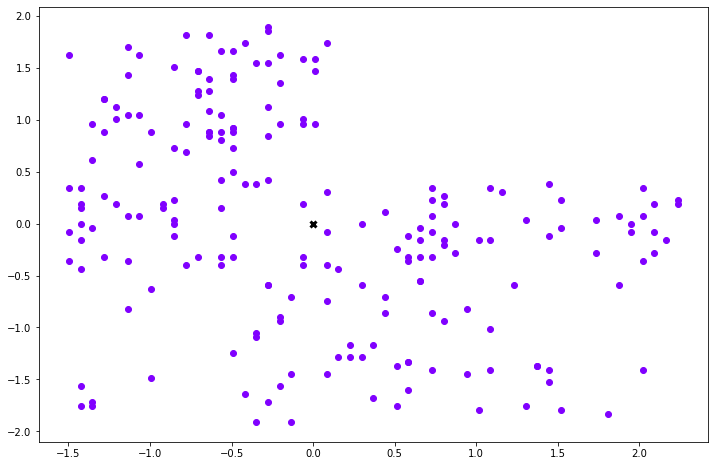

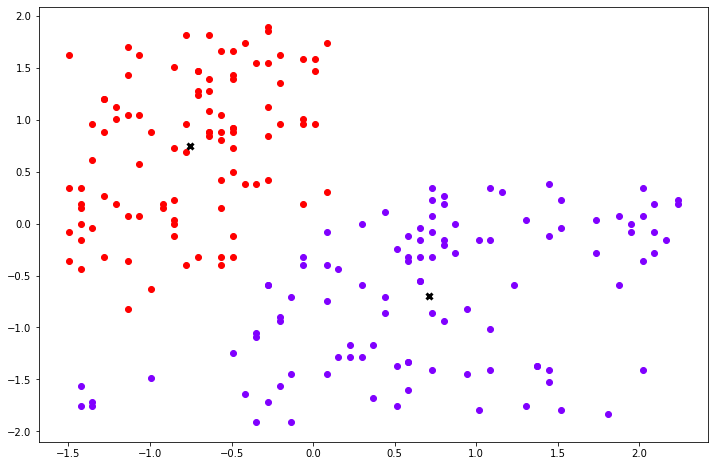

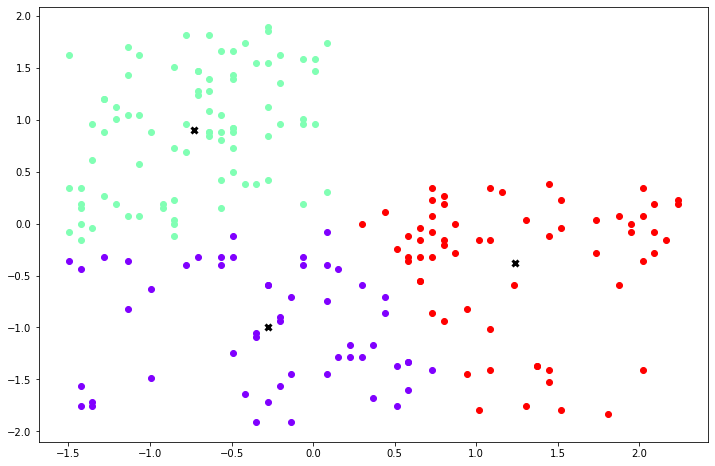

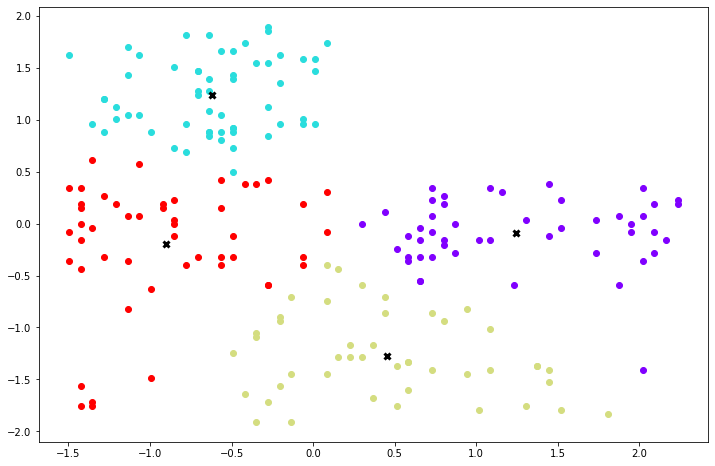

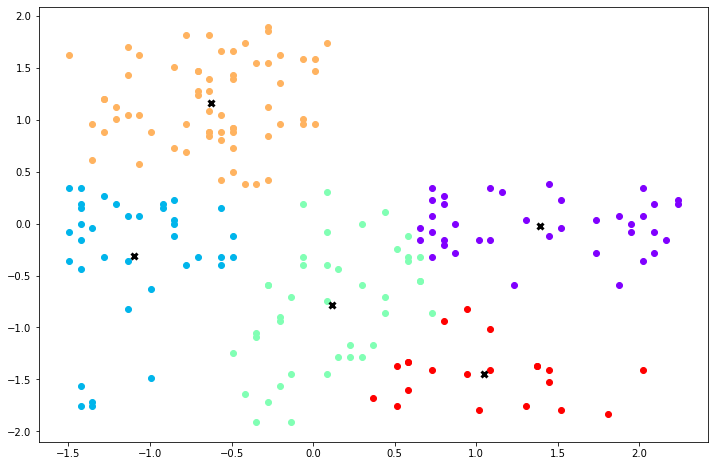

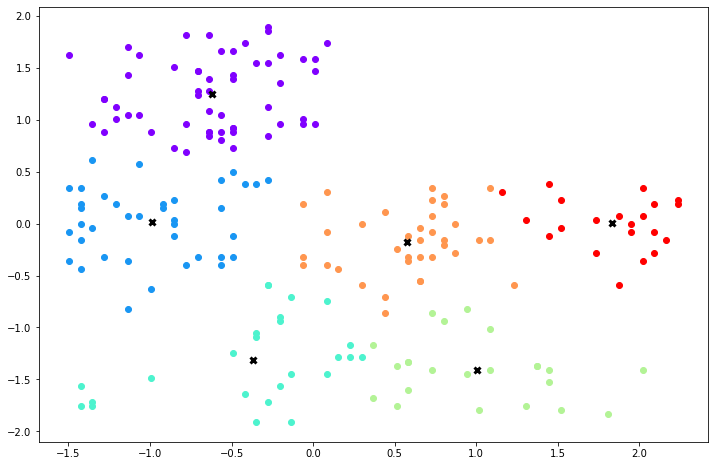

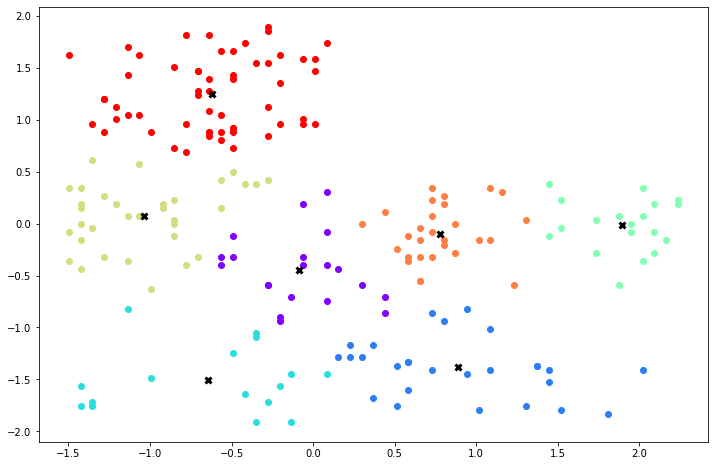

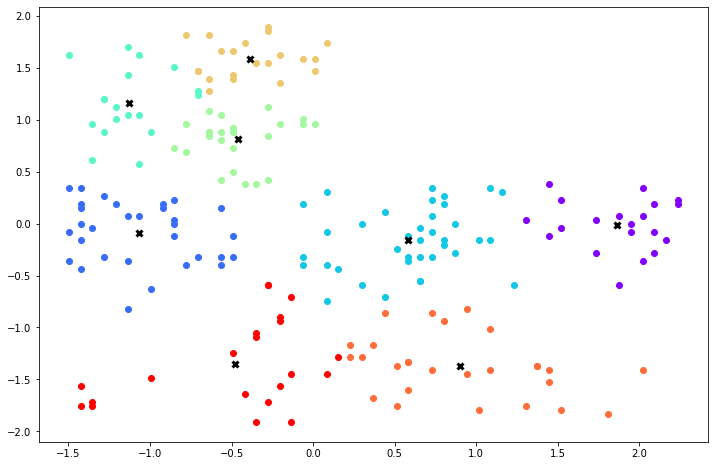

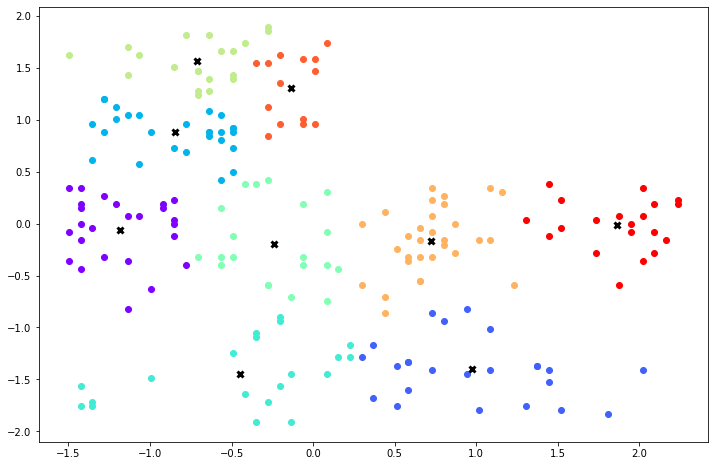

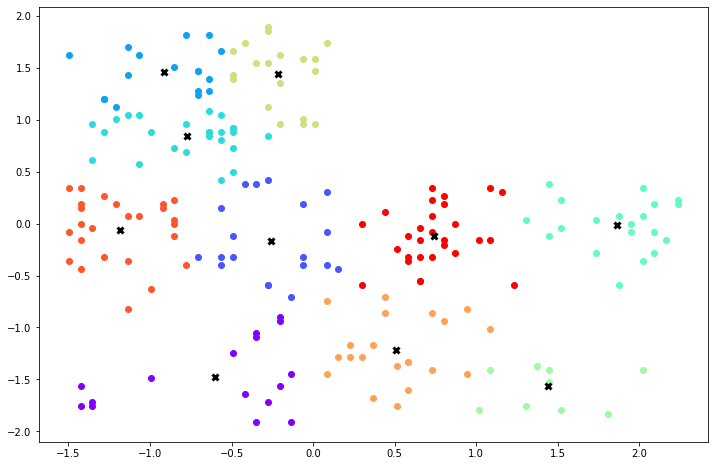

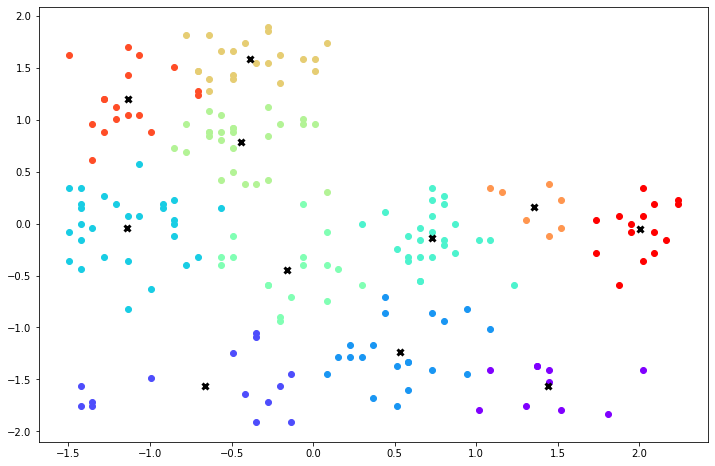

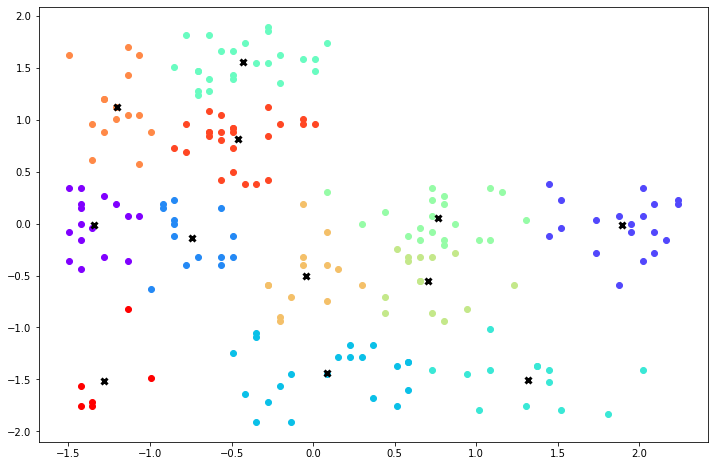

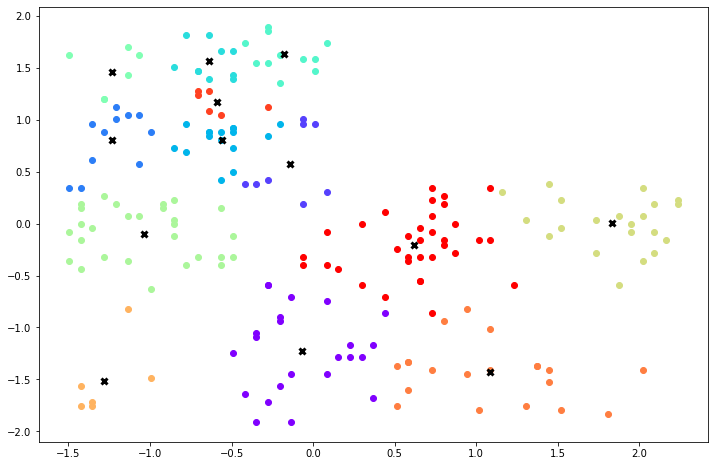

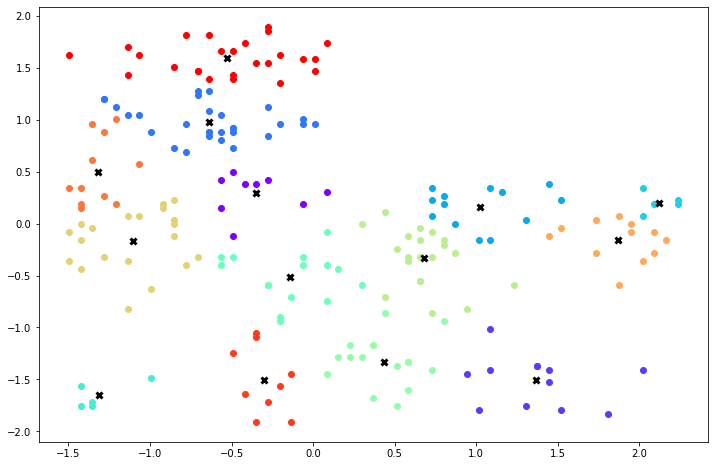

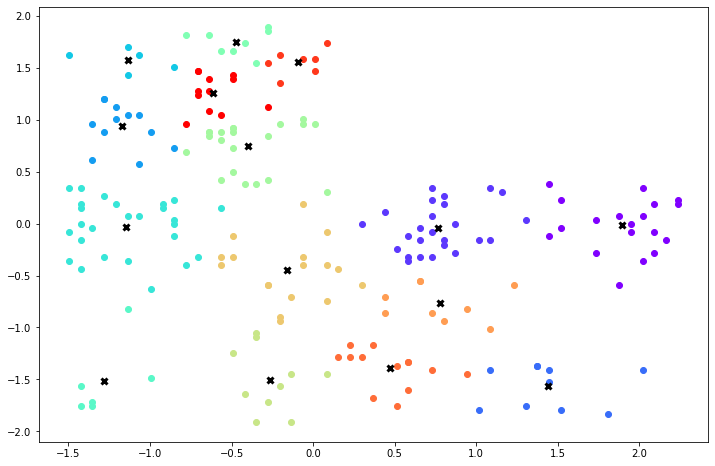

In [67]:
for k in range(1,16):
    cent,points = Kmeans(X,k)
    plot(cent,k,points)


### Step 4
<br>
Use scikit-learn's KMeans class to compare your results with the optimized KMeans algrorithm. Compare it for number of clusters between 1-15 and plot the inertias (hint: you can use scikit-learn's "inertia_" parameter.). Comment on your results.  

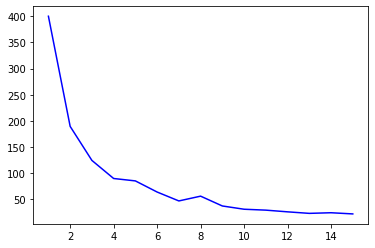

In [68]:
inerts = []
for k in range(1,16):
    centers,points=Kmeans(X,k)
    inerts.append(inertia(centers,k))
plt.plot(range(1,16),inerts,color="blue")
plt.show()

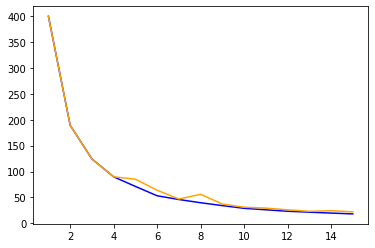

In [69]:
from sklearn.cluster import KMeans
inerts2 = []
for k in range(1,16):
    k_mean = KMeans(n_clusters=k).fit(X)
    inerts2.append(k_mean.inertia_)
plt.plot(range(1,16),inerts2,color="blue")
plt.plot(range(1,16),inerts,color="orange")
plt.show()